**<h2>Introduction</h2>**

For this project I had the idea of finding some interesting space-related data (since space is a great interest of mine), and making a small data science project out of it. After a bit of searching I found an interesting dataset on Kaggle, which has recorded all the space missions all the way from 1957 to 2020. Using this data, I've created an analysis in Colab Notebook. You can download the dataset here:
https://www.kaggle.com/datasets/agirlcoding/all-space-missions-from-1957

**<h2>Data Analysis</h2>**

First, we need to import the necessary libraries for the project and the analysis. After we've uploaded the dataset, we can open it as a dataframe using Pandas library.

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Space_Corrected.csv")

Next, let's take a look at what type of data we're dealing with.

In [265]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


It's also a good idea to see what datatypes we're dealing with here.

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


The describe function is usually handy when it comes understanding the size of the values in data.

In [267]:
data.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


Next, I want to prepare the data for analysis. To do that, I first want to see if the data contains any NaN (Not a number) values.

In [268]:
data.isna().values.any()

True

Since there are NaN values, I want to see how many and more specifically, in which column(s).

In [269]:
data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

Seems like most of the NaN values are found in the 'Rocket' column, which details the cost of each mission in $ million. Since I wasn't that interested in that particular data for the scope of this project, I decided to leave the values as they are.

Next, I wanted to see if there were any duplicated values in the dataset.

In [270]:
data.duplicated().values.any()

False

No duplicated values were found fortunately.

When inspecting the dataframe's datatypes earlier, I noticed that the 'Datum' column was the type of object, instead of datetime. In order to perform date-specific operations, the series needs to converted to be of datetime.

In [271]:
data.Datum = pd.to_datetime(data.Datum,utc=True)

In [272]:
data.Datum

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Datum, Length: 4324, dtype: datetime64[ns, UTC]

As we can see, the series is now type datetime and certain operations can now be performed.

For example, the data can now be grouped with each year as an index.

In [273]:
data.groupby(data.Datum.dt.year).count()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
Datum,,,,,,,,,
1957,3,3,3,3,3,3,3,0,3
1958,28,28,28,28,28,28,28,0,28
1959,20,20,20,20,20,20,20,0,20
1960,39,39,39,39,39,39,39,0,39
1961,52,52,52,52,52,52,52,0,52
...,...,...,...,...,...,...,...,...,...
2016,90,90,90,90,90,90,90,64,90
2017,92,92,92,92,92,92,92,66,92
2018,117,117,117,117,117,117,117,88,117


With that in mind, we can now create a new series where we can count the number of launches per year from the start of the dataset to the very end.

In [274]:
launches_per_year = data.groupby(data['Datum'].dt.year).size()
launches_per_year

Datum
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Length: 64, dtype: int64

With the data in a specific and neat format, it's quite straightforward to create a simple plot of the data to visualize it using Matplotlib.

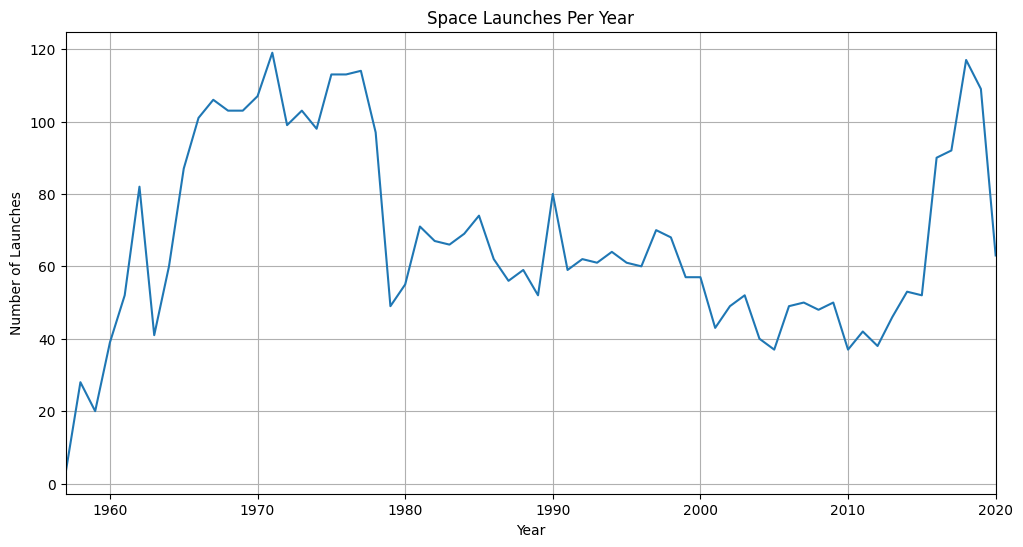

In [275]:
plt.figure(figsize=(12,6))
plt.plot(launches_per_year.index,launches_per_year.values)

plt.title('Space Launches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')

plt.xlim(launches_per_year.index.min(),launches_per_year.index.max())

plt.grid(True)
plt.show()

As we can see, the number of space launches in the data peaked in the early 1970s, took a big dip in 1980s, but started growing quite rapidly again in the mid 2010s. However, maybe the data can even more detailed with e.g. ticks on the x-axis for every year and certain highlights.

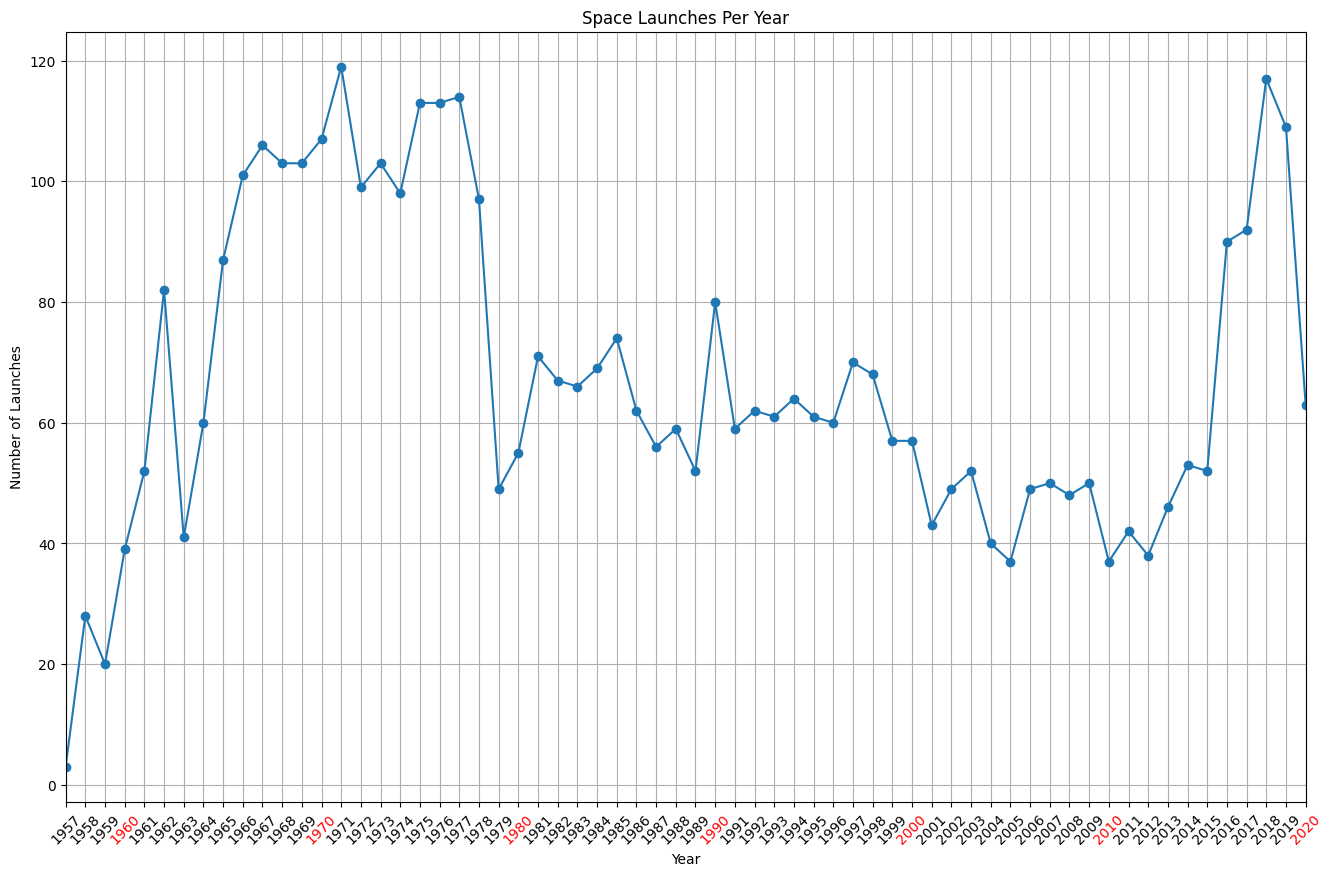

In [276]:
years = np.arange(launches_per_year.index.min(),launches_per_year.index.max()+1,1)

plt.figure(figsize=(16, 10))
plt.plot(launches_per_year.index,launches_per_year.values,marker="o")

plt.xticks(years)
plt.xticks(rotation=45)

plt.title('Space Launches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')

for label in plt.gca().get_xticklabels():
    if int(label.get_text()) % 10 == 0:
        label.set_color('red')

plt.xlim(launches_per_year.index.min(),launches_per_year.index.max())

plt.grid(True)
plt.show()

Next, I wanted to visualize how the success of the space launches has evolved over time. For that, I decided to create a new series specifically.

In [277]:
successful_missions = data[data['Status Mission'] == "Success"]
successful_missions_series = successful_missions.groupby(data["Datum"].dt.year).size()
successful_missions_series

Datum
1957      2
1958      6
1959      8
1960     19
1961     32
       ... 
2016     86
2017     84
2018    113
2019    100
2020     57
Length: 64, dtype: int64

Because the space launches per year series and the successful missions series are very similar, it's also quite simple to visualize them together in one chart.

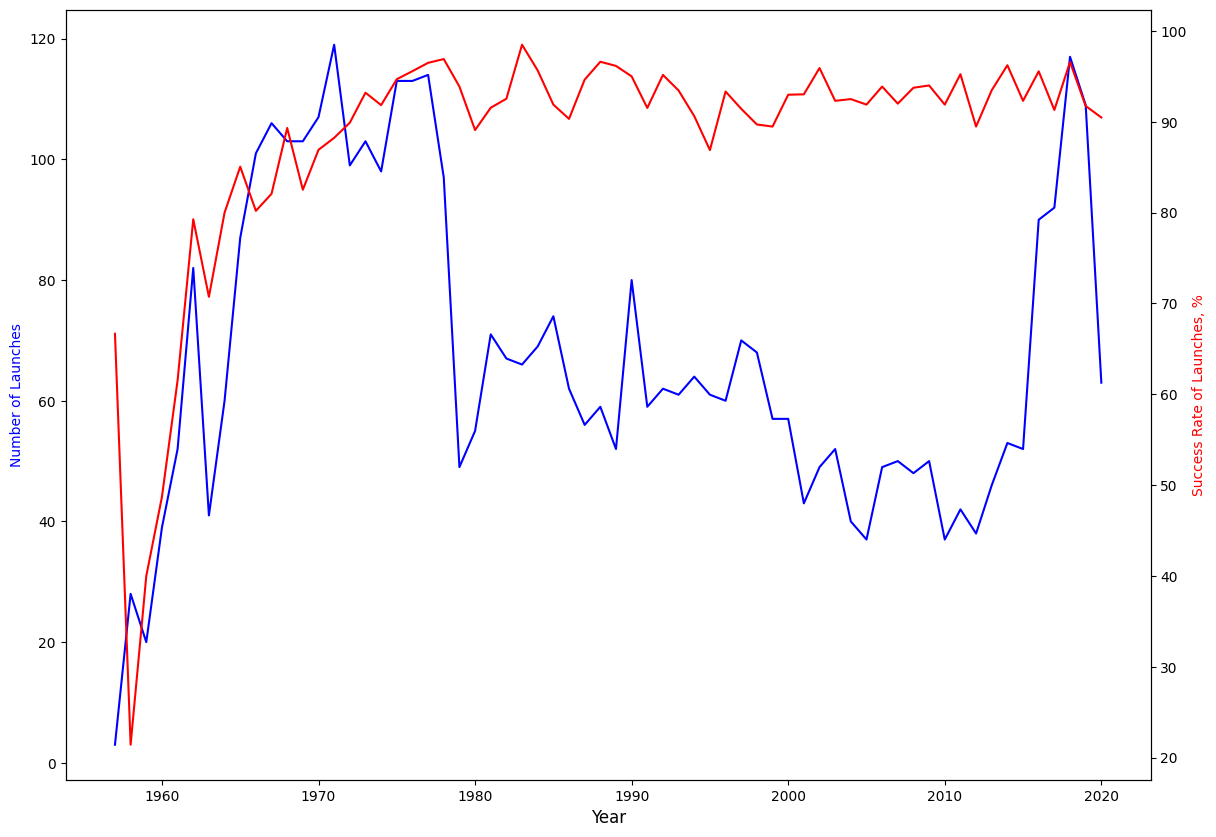

In [278]:
plt.figure(figsize=(14,10))

ax1 = plt.gca()
ax2 = ax1.twinx()

success_rate = successful_missions_series.values/launches_per_year.values * 100

ax1.plot(launches_per_year.index,launches_per_year.values,color="blue")
ax2.plot(successful_missions_series.index,success_rate,color="red")

ax1.set_ylabel("Number of Launches",color="blue")
ax2.set_ylabel("Success Rate of Launches, %",color="red")

ax1.set_xlabel("Year",fontsize=12)
plt.show()

It seems that despite the changing rate of launches over the decades, the success rate of the launches has remained fairly similar over time, at around 90% or a bit more.

Now, I really wanted to visualize how the number of space launches per every different space company, and also to find out how successful their launches have been. To do that, I decided to group the data by company name and mission status.

In [279]:
missions_by_company = data.groupby(["Company Name","Status Mission"]).size()
missions_by_company

Company Name  Status Mission   
AEB           Failure                2
              Prelaunch Failure      1
AMBA          Failure                3
              Partial Failure        1
              Success                4
                                  ... 
VKS RF        Partial Failure        6
              Success              188
Virgin Orbit  Failure                1
Yuzhmash      Success                2
i-Space       Success                1
Length: 119, dtype: int64

However, the data isn't as readable as it could be. Let's use the unstack method, which returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

In [280]:
missions_by_company_unstacked = missions_by_company.unstack()
missions_by_company_unstacked

Status Mission,Failure,Partial Failure,Prelaunch Failure,Success
Company Name,,,,
AEB,2.0,NaN,1.0,NaN
AMBA,3.0,1.0,NaN,4.0
ASI,NaN,NaN,NaN,9.0
Arianespace,7.0,3.0,NaN,269.0
Arm??e de l'Air,NaN,1.0,NaN,3.0
Blue Origin,NaN,NaN,NaN,12.0
Boeing,3.0,2.0,NaN,131.0
CASC,14.0,6.0,NaN,231.0
CASIC,2.0,NaN,NaN,3.0


It already looks much more organized. However, we can see that there's a great amount of NaN values in each column. So I decided to replace each of them with the value of 0 so it's all more organized.

In [281]:
missions_by_company_unstacked = missions_by_company_unstacked.fillna(0)
missions_by_company_unstacked

Status Mission,Failure,Partial Failure,Prelaunch Failure,Success
Company Name,,,,
AEB,2.0,0.0,1.0,0.0
AMBA,3.0,1.0,0.0,4.0
ASI,0.0,0.0,0.0,9.0
Arianespace,7.0,3.0,0.0,269.0
Arm??e de l'Air,0.0,1.0,0.0,3.0
Blue Origin,0.0,0.0,0.0,12.0
Boeing,3.0,2.0,0.0,131.0
CASC,14.0,6.0,0.0,231.0
CASIC,2.0,0.0,0.0,3.0


Now that the data is ready, we can visualize it with a simple bar chart.

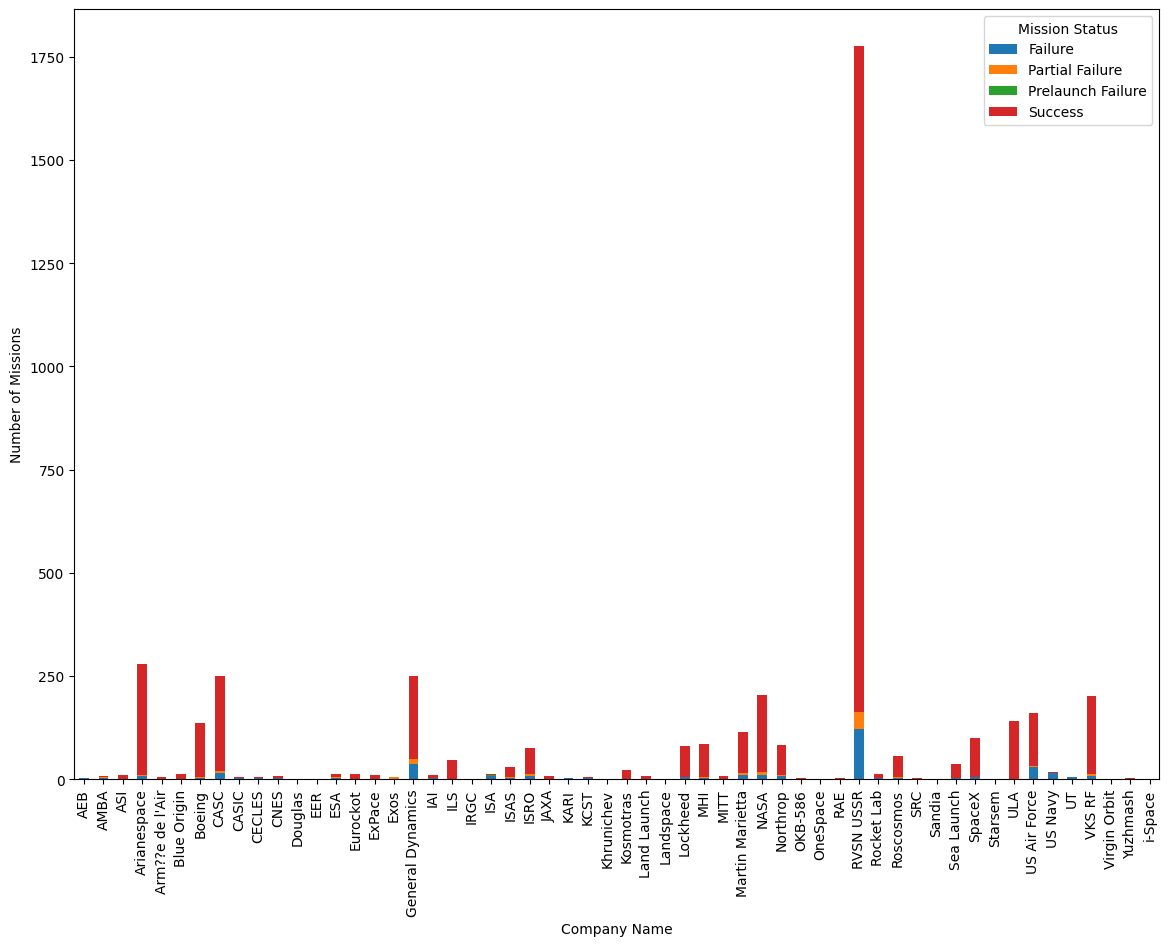

In [282]:
ax = missions_by_company_unstacked.plot(kind="bar",stacked=True,figsize=(14,10))

ax.set_ylabel("Number of Missions")
plt.legend(title="Mission Status")

plt.show()

The bar chart really paints an interesting picture here. For instance, I had no idea that the USSR was so ahead of everyone else in terms of its number of space launches. However,the bar chart can't seem to display bars where the row value is 1. Maybe a simple trick could help with that...

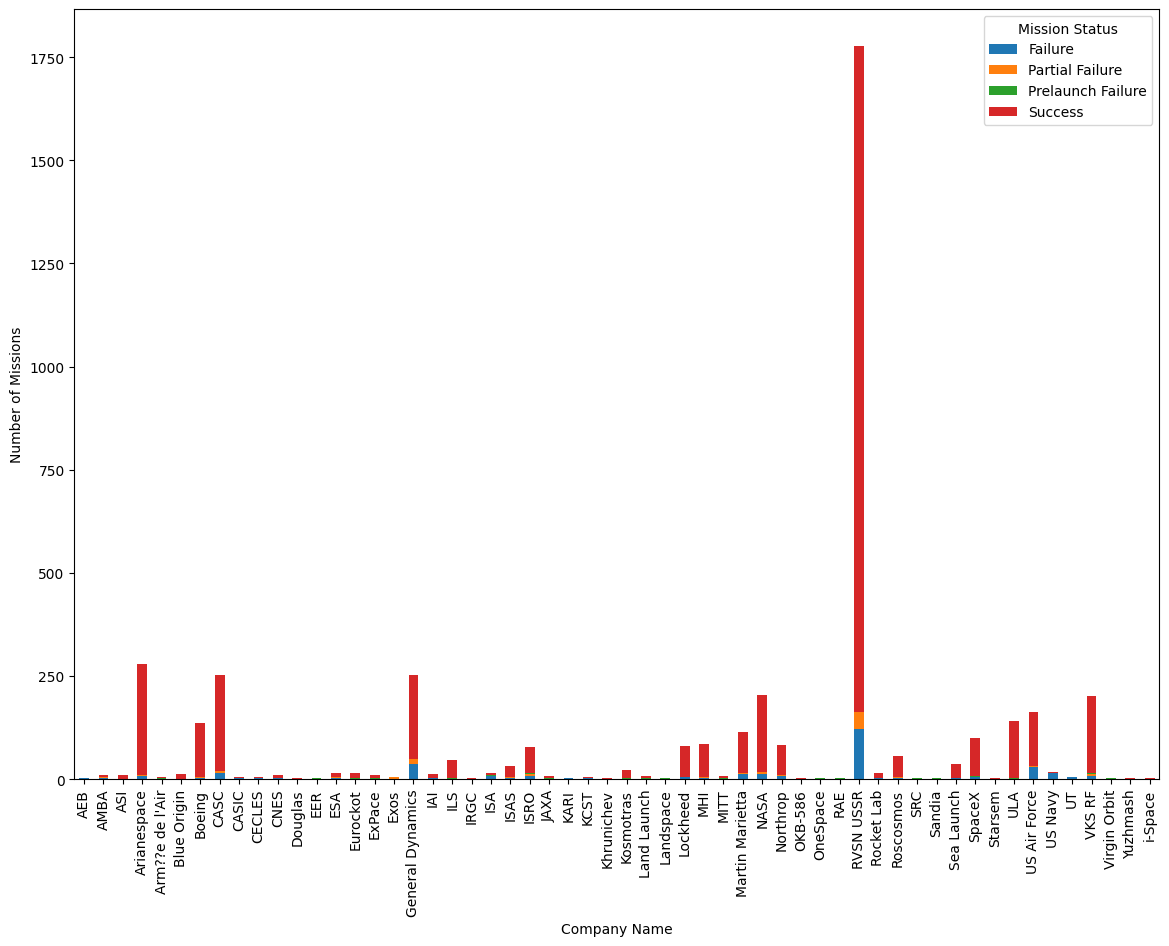

In [283]:
missions_by_company_unstacked_new = missions_by_company_unstacked + 0.2

ax = missions_by_company_unstacked_new.plot(kind="bar",stacked=True,figsize=(14,10))

ax.set_ylabel("Number of Missions")
plt.legend(title="Mission Status")

plt.show()

Now even the smallest values show up on the bar chart correctly. However, maybe the bar chart could be a bit more informative. For that, I'll use the Plotly library.

In [284]:
import plotly.express as px

fig = px.bar(missions_by_company_unstacked, barmode='stack')

fig.update_layout(
    title='Number of Space Missions by Company and Mission Status',
    xaxis_title='Company Name',
    yaxis_title='Number of Missions',
    legend_title='Mission Status',
)

fig.show()

The bar chart is now interactive, but the range between the highest and the lowest numbers is so high that it makes the chart a bit hard to read and visualize. I'll use a logarithmic scale for the mission values to see if it helps here...

In [285]:
import plotly.express as px

fig = px.bar(missions_by_company_unstacked, barmode='stack')

fig.update_layout(
    title='Number of Space Missions by Company and Mission Status',
    xaxis_title='Company Name',
    yaxis_title='Number of Missions',
    legend_title='Mission Status',
    yaxis=dict(type='log')
)

fig.show()

It's definitely easier to visualize now, but one shouldn't forget the implications of the logarithmic y-axis here. For instance, based on a quick glance it would seem that the RSVN USSR had more failures than successful launches. But by hovering on the bar, one can see that the amount of successful launches sits at 1614, whereas there were "only" 121 failed launches. In other words, the logarithmic y-axis definitely helps to spot the smaller values a lot more easily, but it comes with its own set of drawbacks.

**<h2>A Bit of Machine Learning</h2>**

Finally, I wanted to try something that was a lot more unfamiliar to me. The dataset only covers the years from 1957 to 2020, but I wanted to extrapolate the data to extend all the way to the year 2030. To do that, I did some online searching and ended up utilizing the Statsmodels library and the Holt-Winters method for this purpose.

First, I imported the necessary class(es) and figured the range of the years that I needed.

In [286]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

last_year = launches_per_year.index[-1]
forecast_years = 2030 - last_year

Secondly, I utilized the ExponentialSmoothing class and its 'fit' method to create an object named 'model', that uses the launches_per_year series as its data.

In [287]:
model = ExponentialSmoothing(launches_per_year, trend='add', seasonal=None,
                             damped_trend=False).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Next, I created a brand new forecast series of launch data using the years from 2021 to 2030.

In [288]:
forecast = model.forecast(steps=forecast_years)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



And finally, I created a simple prediction chart that combines that previous launches per year data, and the new forecast data.

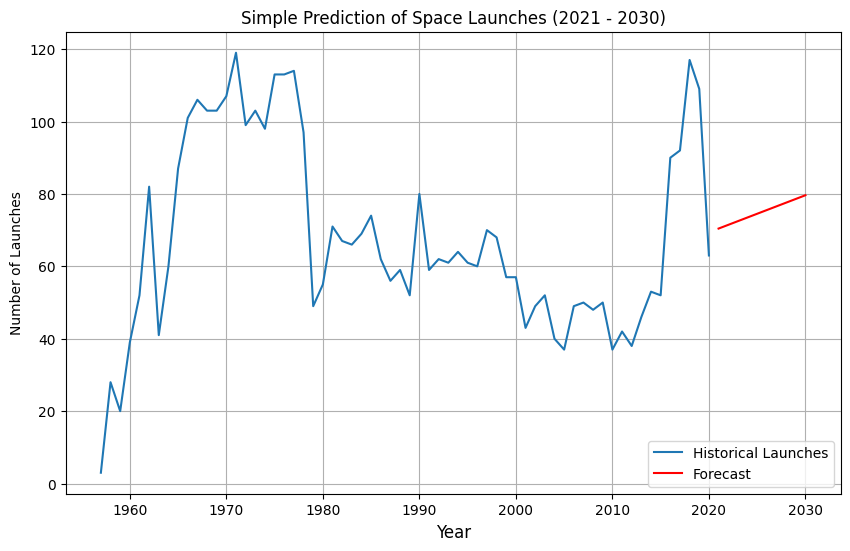

In [289]:
plt.figure(figsize=(10,6))
plt.plot(launches_per_year, label='Historical Launches')

forecast_index = pd.RangeIndex(start=last_year + 1, stop=2031, step=1)
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('Simple Prediction of Space Launches (2021 - 2030)')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Launches')
plt.grid()
plt.legend()
plt.show()

As we can see, the number of space launches is expected to increase according to this simple prediction model. However, it's important to note that while this method provides an educated projection based on historical data (1957-2020), the forecast is based on historical trends and doesn't account for unforeseen future events, new policies, technology advacements and so on.

**<h2>Conclusion and Future Directions</h2>**

This analysis has provided a comprehensive exploration of space mission data from 1957 to 2020. We have visualized the frequency and success rates of missions, examined the trends in space exploration activities, and identified the leading contributors to space missions over these decades. Moreover, the created visualizations offer an engaging way to explore the intricacies of this rich dataset.

In the final section, we ventured into forecasting future space mission frequencies up to the year 2030 using the Holt-Winters Exponential Smoothing model. This model, while a powerful tool for time series forecasting, is inherently based on historical trends. Therefore, it's important to note that the forecast can't account for future events and changes, that could significantly influence future space activities.

Looking ahead, I figured that there could be several potential areas for further research and analysis: <br><br>


**-Including additional data**: Future studies could try to integrate more recent data or additional variables such as the type of mission or the technological aspects of the spacecraft.

**-Utilizing more advanced data forecasting models**: Exploring more complex forecasting models that can incorporate external factors or sudden shifts in trends could perhaps yield more refined predictions.

Overall, this project has been a fascinating journey through the realm of space missions and offered both historical insights and a small glimpse into the future of space exploration, and goes to show how data analysis can help to uncover patterns and stories within complex datasets.